<a href="https://colab.research.google.com/github/preethi9999/info5731_spring2021/blob/main/somaraju_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [52]:
#importing the required libraries

import pandas as pd
import spacy
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
import gensim
import gensim.corpora as corpora
from gensim import models





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df = pd.read_csv("/content/sample_data/input.csv")
df.head()

,Abstract
0,introduction statistical natural language proc...
1,the paper summarizes essential property docume...
2,abstract language way communicating word langu...
3,we report experiment use standard natural lang...
4,paper describe simple rule based approach auto...


In [54]:
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

In [38]:
# Data cleaning
df['Lower Casing'] = df['Abstract'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Tokenization'] = df['Lower Casing'].apply(lambda x: tokenizer.tokenize(x))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in words])
df['Stemming'] = df['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [40]:
words1 = []
for line in df['Stemming']:
  words1.append(line)

In [41]:
#ngrams
bigram = models.Phrases(words1, min_count=5, threshold=100)
trigram = models.Phrases(bigram[words1], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[words1[0]]])

['introduct', 'statist', 'natur', 'languag', 'process', 'snlp', 'field', 'lie', 'intersect', 'natur', 'languag', 'process', 'machin', 'learn', 'snlp', 'di', 'er', 'tradit', 'natur', 'languag', 'process', 'instead', 'linguist', 'manual', 'construct', 'model', 'given', 'linguist']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [42]:
def bigrams(words1):
    return [bigram_mod[doc] for doc in words1]
  
def trigrams(words1):
    return [trigram_mod[bigram_mod[doc]] for doc in words1]

def lemmatization(words1, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    words_out = []
    for sent in words1:
        doc = nlp(" ".join(sent)) 
        words_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return words_out

In [43]:
data_words_bigrams = bigrams(words1)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['process', 'lie', 'process', 'learn', 'snlp', 'process', 'instead', 'linguist', 'manual', 'construct', 'model', 'give', 'linguist']]


In [44]:
id2word = corpora.Dictionary(data_lemmatized)
words1 = data_lemmatized
corpus = [id2word.doc2bow(word) for word in words1]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 1)]]


In [45]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('construct', 1),
  ('give', 1),
  ('instead', 1),
  ('learn', 1),
  ('lie', 1),
  ('linguist', 2),
  ('manual', 1),
  ('model', 1),
  ('process', 3),
  ('snlp', 1)]]

In [46]:
#LDA model
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [47]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"process" + 0.027*"par" + 0.027*"differ" + 0.022*"learn" + '
  '0.022*"paper" + 0.016*"even" + 0.016*"signific" + 0.016*"result" + '
  '0.016*"effect" + 0.016*"extract"'),
 (1,
  '0.041*"would" + 0.021*"process" + 0.021*"test" + 0.021*"sen" + 0.021*"sign" '
  '+ 0.021*"chapter" + 0.014*"brief" + 0.014*"approach" + 0.014*"comput" + '
  '0.014*"go"'),
 (2,
  '0.036*"process" + 0.021*"drive" + 0.021*"comput" + 0.021*"use" + '
  '0.021*"object" + 0.016*"year" + 0.016*"make" + 0.016*"recent" + '
  '0.016*"task" + 0.016*"pattern"'),
 (3,
  '0.073*"process" + 0.046*"system" + 0.023*"develop" + 0.019*"linguist" + '
  '0.019*"learn" + 0.016*"current" + 0.012*"task" + 0.012*"approach" + '
  '0.012*"inform" + 0.012*"word"'),
 (4,
  '0.058*"task" + 0.035*"model" + 0.030*"process" + 0.024*"databa" + '
  '0.024*"stage" + 0.024*"present" + 0.024*"support" + 0.024*"domain" + '
  '0.015*"learn" + 0.013*"develop"'),
 (5,
  '0.099*"process" + 0.025*"learn" + 0.019*"system" + 0.019*"confid" 

In [ ]:
''' Top 10 topics using LDA method Description
1. It is mostly concentrating on learning the process and extraction
2. It is concerned with nlp present use cases
3. It is associated with documents logic and understanding topics
4. It is associated with paper visual representation topics
5. It is associated with topics on elements structure basics
6. It is associated with the need of current sophisticated structures
7. It is associated with topics concerning development of linguistics
8. It deals with sentiment and confidence parameters
9. It deals with topics related with music and lyrics
10. It deals with high dimension data topics
'''

In [48]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.314218893947042

Coherence Score:  0.383767556601596


In [49]:
#LSA model
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [50]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '0.761*"process" + 0.246*"system" + 0.199*"learn" + 0.180*"use" + '
  '0.159*"task" + 0.132*"develop" + 0.106*"model" + 0.101*"linguist" + '
  '0.101*"text" + 0.095*"word"'),
 (1,
  '0.676*"would" + 0.338*"sen" + 0.338*"sign" + 0.337*"use" + 0.173*"web" + '
  '-0.122*"system" + -0.115*"process" + 0.113*"ldoce" + 0.113*"load" + '
  '0.113*"represent"'),
 (2,
  '-0.404*"web" + -0.363*"use" + 0.355*"would" + 0.292*"system" + '
  '-0.227*"inform" + -0.206*"task" + 0.199*"process" + 0.178*"sign" + '
  '0.178*"sen" + -0.125*"base"'),
 (3,
  '-0.516*"word" + 0.380*"system" + -0.196*"par" + 0.184*"web" + '
  '-0.164*"semant" + -0.153*"similar" + 0.152*"inform" + 0.135*"limit" + '
  '-0.127*"text" + -0.124*"featur"'),
 (4,
  '-0.494*"system" + 0.336*"learn" + -0.309*"word" + 0.174*"process" + '
  '-0.172*"effect" + -0.166*"inform" + -0.130*"par" + 0.129*"logic" + '
  '0.128*"linguist" + -0.127*"web"'),
 (5,
  '-0.409*"task" + -0.379*"learn" + -0.276*"approach" + 0.222*"process" + '
  '-0

In [ ]:

''' Top 10 topics using LDA method Description
1. It is mostly concentrating on uses of various models
2. It is concerned with various processes
3. It is associated with documents logic and understanding topics
4. It is associated with web semantics
5. It is associated with topics on system learning and linguistics
6. It is associated with topics regarding approch and learning 
7. It is associated with topics relating gaining information about models and usage
8. It is associated with topics concerning development of linguistics
9. It deals with topics related to logic and effects in computer field
10. It deals with topic relating learning and development of web programs
'''

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [55]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
mydata = pd.read_csv("/content/sample_data/cleaned_data.csv")
mydata.head()

,document_id,clean text,sentiment
0,0,introduction statistical natural language proc...,positive
1,1,the paper summarizes essential property docume...,positive
2,2,abstract language way communicating word langu...,positive
3,3,we report experiment use standard natural lang...,positive
4,4,paper describe simple rule based approach auto...,positive


In [61]:
#checking for any null values and dropping
mydata = mydata.dropna(how='any',axis=0) 

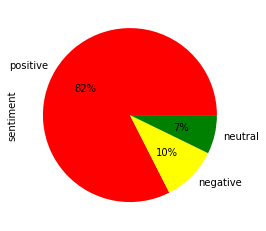

In [62]:
#Analysis of sentiment
mydata.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [64]:
#preprocessing
from nltk.corpus import stopwords
from textblob import TextBlob
mydata['Cleaned Text'] = mydata['clean text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
mydata['Cleaned Text'] = mydata['Cleaned Text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
mydata['Cleaned Text'] = mydata['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [66]:
#selecting the required features
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(mydata['clean text'])
x_values = Tfidfvector.transform(mydata['clean text'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(mydata['sentiment'])

In [80]:
#80%training data 20% test data
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.2)

In [81]:
#Naive Bayes algorithm and getting performance values
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)
print("Accuracy:{0}".format(accuracy_score(y_test, predicted_nb)))
Final_nb = classification_report(y_test, predicted_nb, output_dict=True)
Final_nb

Accuracy:0.7


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 4},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 2},
 '2': {'f1-score': 0.8235294117647058,
  'precision': 0.7,
  'recall': 1.0,
  'support': 14},
 'accuracy': 0.7,
 'macro avg': {'f1-score': 0.2745098039215686,
  'precision': 0.2333333333333333,
  'recall': 0.3333333333333333,
  'support': 20},
 'weighted avg': {'f1-score': 0.5764705882352941,
  'precision': 0.48999999999999994,
  'recall': 0.7,
  'support': 20}}

In [83]:
#SVM algorithm and getting performance values
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)
print("Accuracy: {0}".format(accuracy_score(y_test, predicted)))
Final = classification_report(y_test, predicted, output_dict=True)
Final

Accuracy: 0.7


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 4},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 2},
 '2': {'f1-score': 0.8235294117647058,
  'precision': 0.7,
  'recall': 1.0,
  'support': 14},
 'accuracy': 0.7,
 'macro avg': {'f1-score': 0.2745098039215686,
  'precision': 0.2333333333333333,
  'recall': 0.3333333333333333,
  'support': 20},
 'weighted avg': {'f1-score': 0.5764705882352941,
  'precision': 0.48999999999999994,
  'recall': 0.7,
  'support': 20}}

In [ ]:
'''

Naive Bayes : This is the 1st algorithm i have choosen for developing machine learning classifier from the above list.
It is a probabilistic machine learning algorithm used for various classification tasks. This algoirthm is not only simple but it is 
also fast accurate and reliable. It is mostly used for Natural language processing problems. 

From the above results the performance values for this algorithm accuracy as 70% precision as 48% 

SVM : This is the 2nd algorithm i have choosen for developing machine learning classifier from the above list.
support vector machines are supervised machine learning models associated with learning algorithms analyse data for classification and regression.
It gives clear classification and works well for high dimensional spaces.

From the above results the performance values for this algorithm accuracy as 70% and precision as 23%

From the above performance values accuracy values are almost equal but precision of Naive Bayes is high compared to that of SVM

'''


In [84]:
#Tried Random forest classifier and getting accuracy

features = mydata.iloc[:, 1].values
labels = mydata.iloc[:, 2].values

In [85]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [86]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [88]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
predictions = text_classifier.predict(X_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 0  0  3]
 [ 0  0  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         1
    positive       0.80      1.00      0.89        16

    accuracy                           0.80        20
   macro avg       0.27      0.33      0.30        20
weighted avg       0.64      0.80      0.71        20

0.8


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [92]:
#Importing all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import math
import time
import re
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [94]:
#Loading the Training and testing data

train_data=pd.read_csv("/content/sample_data/train.csv")
test_data=pd.read_csv("/content/sample_data/test.csv")

print("Number of data points in training data:{0}\nNumber of features in training data:{1}".format(train_data.shape[0],train_data.shape[1]))
print("Number of data points in testing data:{0}\nNumber of features in testing data:{1}".format(test_data.shape[0],test_data.shape[1]))

Number of data points in training data:1460
Number of features in training data:81
Number of data points in testing data:1459
Number of features in testing data:80


In [95]:
#display contents of training data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
#display contents of testing data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [97]:
print(train_data.isnull().sum())
train_data = train_data.replace(np.NaN,0)
print(train_data.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [99]:
print(test_data.isnull().sum())
test_data = test_data.replace(np.NaN,0)
print(test_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [101]:
column = list(train_data.select_dtypes(['object']).columns)

In [103]:
#performing basic stats on training and testing data
for i in train_data.columns:
    print("Statistics for feature : {0}".format(i))
    print(train_data[i].describe())
    print("\n")


Statistics for feature : Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


Statistics for feature : MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


Statistics for feature : MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


Statistics for feature : LotFrontage
count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


Statistics for feature : LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000


In [105]:
for i in test_data.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(test_data[i].describe())
    print("\n")

Basic statistics for feature : Id
count    1459.000000
mean     2190.000000
std       421.321334
min      1461.000000
25%      1825.500000
50%      2190.000000
75%      2554.500000
max      2919.000000
Name: Id, dtype: float64


Basic statistics for feature : MSSubClass
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


Basic statistics for feature : MSZoning
count     1459
unique       6
top         RL
freq      1114
Name: MSZoning, dtype: object


Basic statistics for feature : LotFrontage
count    1459.000000
mean       57.910212
std        32.266054
min         0.000000
25%        44.000000
50%        63.000000
75%        78.000000
max       200.000000
Name: LotFrontage, dtype: float64


Basic statistics for feature : LotArea
count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.00000

In [107]:
#Statistics of predicting variable
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [109]:
train_data[column] = train_data[column].apply(lambda x: x.astype('category'))
train_data[column] = train_data[column].apply(lambda x: x.cat.codes)

In [110]:
test_data[column] = test_data[column].apply(lambda x: x.astype('category'))
test_data[column] = test_data[column].apply(lambda x: x.cat.codes)

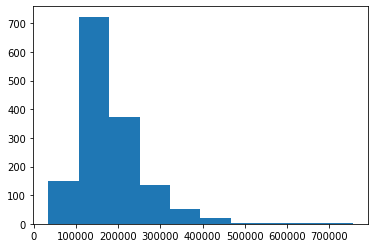

In [111]:
#plotting the graph
plt.hist(train_data['SalePrice'])
plt.show()

In [113]:
print ("Skewness of SalePrice:", train_data['SalePrice'].skew())

Skewness of SalePrice: 1.8828757597682129


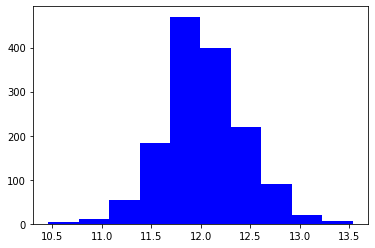

In [115]:
#To normalise skewness applying transformation
train_data['LT_SalePrice'] = np.log(train_data['SalePrice']+1)
plt.hist(train_data['LT_SalePrice'], color='blue')
plt.show()

In [116]:
#Transformed skewness
print ("Skewness of Log Transformed SalePrice:", train_data['LT_SalePrice'].skew())
#It looks normal compared to the one without transformation

Skewness of Log Transformed SalePrice: 0.12134661989685329


In [118]:
#Correlation 
correlate = train_data.corr(method='pearson')
print("correlation:\n", correlate['SalePrice'])

correlation:
 Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.166872
LotFrontage      0.209624
LotArea          0.263843
                   ...   
YrSold          -0.028923
SaleType        -0.054911
SaleCondition    0.213092
SalePrice        1.000000
LT_SalePrice     0.948374
Name: SalePrice, Length: 82, dtype: float64


In [120]:
train_data.select_dtypes(include=[np.number]).columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

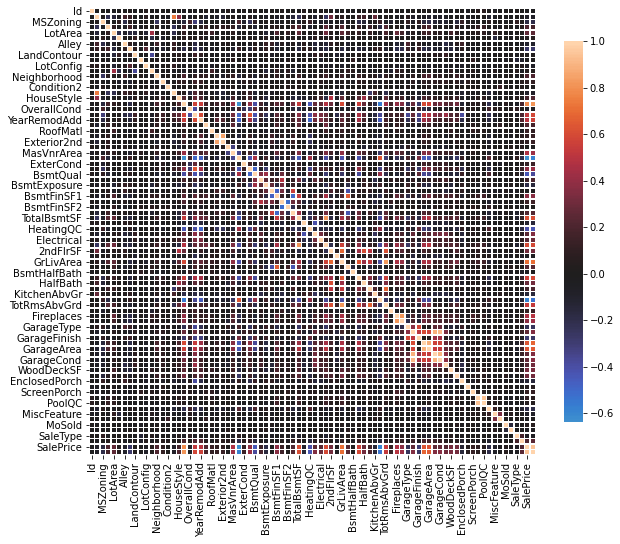

In [122]:
#correlation heatmap train data and test data
import seaborn as sns
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(train_data)

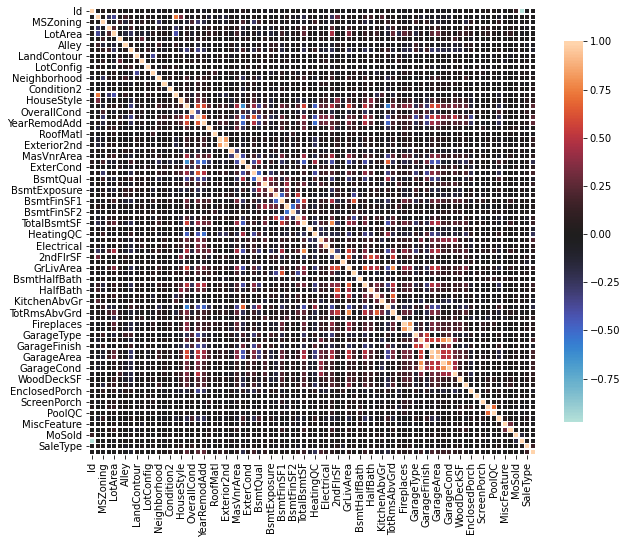

In [124]:
def correlation_heatmap(test_data):
    correlations = test_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test_data)

In [126]:
columns = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars','GarageArea']

In [127]:
#Developing model for predicting house price
X = train_data[columns]
Y = train_data['SalePrice']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [129]:
mytest =test_data[columns]

In [132]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
#getting Rsquared value
y_pred = reg_model.predict(X_test)
print('R squared value is : %.4f' % reg_model.score(X_test,y_test))
#From the below value it is good model as 83% of variations is explained by input variables

R squared value is : 0.8379


In [134]:
predicted_value = reg_model.predict(mytest)

In [135]:
print('Predicted values of house prices:')
print(pd.DataFrame({'Predicted Price':predicted_value}))

Predicted values of house prices:
      Predicted Price
0        91999.486628
1       146014.569048
2       152275.661837
3       181545.347071
4       196500.106334
...               ...
1454     57780.813533
1455     79833.635129
1456    150966.348431
1457     93242.203392
1458    216229.480285

[1459 rows x 1 columns]
